In [5]:
import pandas as pd
import io
dataset = pd.read_csv('./train.csv')
print(dataset.describe())


                 id       feat_1        feat_2        feat_3        feat_4  \
count  61878.000000  61878.00000  61878.000000  61878.000000  61878.000000   
mean   30939.500000      0.38668      0.263066      0.901467      0.779081   
std    17862.784315      1.52533      1.252073      2.934818      2.788005   
min        1.000000      0.00000      0.000000      0.000000      0.000000   
25%    15470.250000      0.00000      0.000000      0.000000      0.000000   
50%    30939.500000      0.00000      0.000000      0.000000      0.000000   
75%    46408.750000      0.00000      0.000000      0.000000      0.000000   
max    61878.000000     61.00000     51.000000     64.000000     70.000000   

             feat_5        feat_6        feat_7        feat_8        feat_9  \
count  61878.000000  61878.000000  61878.000000  61878.000000  61878.000000   
mean       0.071043      0.025696      0.193704      0.662433      1.011296   
std        0.438902      0.215333      1.030102      2.25577

In [6]:
# We will use the Seaborn library
import seaborn as sns
sns.set()

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt


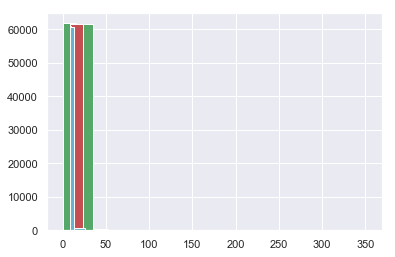

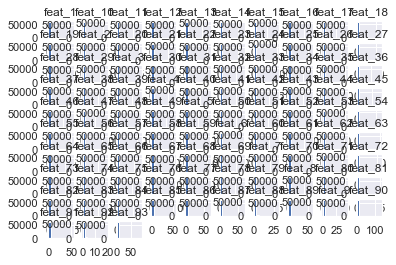

In [7]:
#plot the features 

features = []
for x in range(1,94):
  features.append('feat_' + str(x))
  dataset[dataset.columns[x]].hist();
dataset[features].hist();

In [8]:

# `pairplot()` may become very slow with the SVG format
#%config InlineBackend.figure_format = 'png'
#sns.pairplot(dataset);

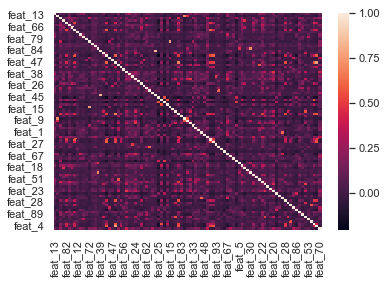

In [9]:
# Drop non-numerical variables
numerical = list(set(dataset.columns[1:]))

# Calculate and plot
corr_matrix = dataset[numerical].corr()
sns.heatmap(corr_matrix);

In [10]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [11]:
X

array([[    1,     1,     0, ...,     0,     0,     0],
       [    2,     0,     0, ...,     0,     0,     0],
       [    3,     0,     0, ...,     0,     0,     0],
       ...,
       [61876,     0,     0, ...,     0,     0,     0],
       [61877,     1,     0, ...,     3,    10,     0],
       [61878,     0,     0, ...,     0,     2,     0]], dtype=int64)

In [12]:
y

array(['Class_1', 'Class_1', 'Class_1', ..., 'Class_9', 'Class_9',
       'Class_9'], dtype=object)

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


MLP

In [15]:
#Fitting using the MLP model
#reference: https://scikit-learn.org/stable/modules/neural_networks_supervised.html
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [16]:
#Predicting using the MLP model
clf_predict = clf.predict(X_test)
clf_predict

array(['Class_2', 'Class_6', 'Class_6', ..., 'Class_9', 'Class_6',
       'Class_2'], dtype='<U7')

In [17]:
#Accuracy score of the model
#reference : https://discuss.analyticsvidhya.com/t/how-to-calculate-the-accuracy-score-of-a-model-in-python/5622/3
from sklearn.metrics import accuracy_score
accuracy_score(y_test,clf_predict)

0.9794764059469941

KNN


In [18]:
# Fitting K-Nearest Neighbour
#reference : https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
from sklearn.neighbors import KNeighborsClassifier  
KNN_classifier = KNeighborsClassifier(n_neighbors=6)  
KNN_classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [19]:
#Predict the response for the test dataset
KNN_predict = KNN_classifier.predict(X_test)
KNN_predict

array(['Class_2', 'Class_6', 'Class_6', ..., 'Class_9', 'Class_6',
       'Class_2'], dtype=object)

In [20]:
#Accuracy score of the model
#reference : https://discuss.analyticsvidhya.com/t/how-to-calculate-the-accuracy-score-of-a-model-in-python/5622/3
from sklearn.metrics import accuracy_score
accuracy_score(y_test,KNN_predict)

0.8410633484162896

Support Vector Machine

In [86]:
#Fitting SVM (Support Vector Machines) SVC (Support Vector Classification) to the Training set
#reference 1 : https://scikit-learn.org/stable/modules/svm.html
#reference 2 : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
from sklearn.svm import SVC
svm_classifier = SVC(gamma='auto', probability = True)
#train the svm classifier
svm_classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [87]:
#Predict the response for the test dataset
SVM_predict = svm_classifier.predict(X_test)
SVM_predict

array(['Class_2', 'Class_6', 'Class_6', ..., 'Class_9', 'Class_6',
       'Class_2'], dtype=object)

In [88]:
#Accuracy score of the model
#reference : https://discuss.analyticsvidhya.com/t/how-to-calculate-the-accuracy-score-of-a-model-in-python/5622/3
from sklearn.metrics import accuracy_score
accuracy_score(y_test,SVM_predict)

0.946590174531351

# Random Forest

In [24]:
#Fitting Random Forest Classifier model
#reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
#Predict the response for the test dataset
rf_predict = rf_classifier.predict(X_test)
rf_predict

array(['Class_2', 'Class_6', 'Class_6', ..., 'Class_9', 'Class_6',
       'Class_2'], dtype=object)

In [26]:

#Accuracy score of the model
#reference : https://discuss.analyticsvidhya.com/t/how-to-calculate-the-accuracy-score-of-a-model-in-python/5622/3
from sklearn.metrics import accuracy_score
accuracy_score(y_test,rf_predict)

0.9778603749191984

# XGBoost Methods

In [28]:
#reference 1: https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/
#reference 2: https://xgboost.readthedocs.io/en/latest/python/python_api.html
import xgboost
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(min_child_weight=0.5, learning_rate=0.2, max_depth = 2, n_estimators = 10)
xgb_classifier.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=2, min_child_weight=0.5, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [29]:
xgb_predict = xgb_classifier.predict(X_test)
xgb_predict

array(['Class_2', 'Class_6', 'Class_6', ..., 'Class_9', 'Class_6',
       'Class_2'], dtype=object)

In [30]:
#Accuracy score of the model
#reference : https://discuss.analyticsvidhya.com/t/how-to-calculate-the-accuracy-score-of-a-model-in-python/5622/3
from sklearn.metrics import accuracy_score
accuracy_score(y_test,xgb_predict)

0.9990303813833226

# ROC

### MLP

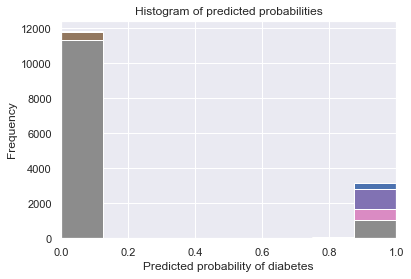

In [77]:
#refernce : https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb 
import numpy as np
probs = clf.predict_proba(X_test)

for i in range(1,9):
    preds = probs[:,i]
    preds.shape, y_test.shape

    preds[:]


    # histogram of predicted probabilities
    plt.hist(preds, bins=8)
    plt.xlim(0, 1)
    plt.title('Histogram of predicted probabilities')
    plt.xlabel('Predicted probability of diabetes')
    plt.ylabel('Frequency')


# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


Sensitivity: nan
Specificity: 0.9935358758888171
Sensitivity: 0.008108108108108109
Specificity: 0.7415458937198067
Sensitivity: 0.012168486739469579
Specificity: 0.8374223094537128
Sensitivity: 0.016170763260025874
Specificity: 0.948107109879963
Sensitivity: 0.0017667844522968198
Specificity: 0.9583403895004233
Sensitivity: 0.0036900369003690036
Specificity: 0.7794490451242184
Sensitivity: 0.007084661707403472
Specificity: 0.9420077462577201
Sensitivity: 0.02972027972027972
Specificity: 0.8570823449678076
Sensitivity: 0.008220786846741044
Specificity: 0.9039632718073644


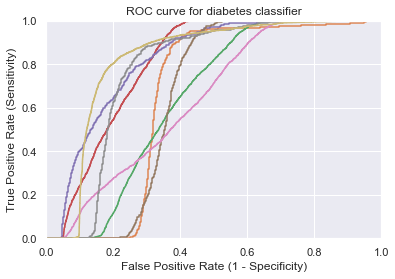

In [78]:
#reference : https://www.youtube.com/watch?v=85dtiMz9tSo
for i in range(9):
    new_y_test = [j == 'Class_'+str(i) for j in y_test]

    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    fpr, tpr, thresholds = metrics.roc_curve(new_y_test, probs[:,i])
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC curve for diabetes classifier')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)
    evaluate_threshold(0.5)


### KNN

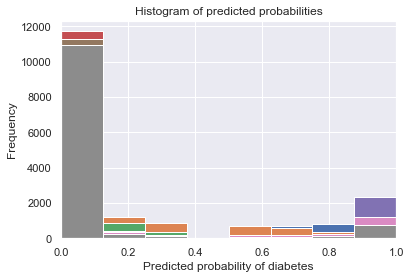

In [82]:
#refernce : https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb 
import numpy as np
probs = KNN_classifier.predict_proba(X_test)

for i in range(1,9):
    preds = probs[:,i]
    preds.shape, y_test.shape

    preds[:]


    # histogram of predicted probabilities
    plt.hist(preds, bins=8)
    plt.xlim(0, 1)
    plt.title('Histogram of predicted probabilities')
    plt.xlabel('Predicted probability of diabetes')
    plt.ylabel('Frequency')


# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


Sensitivity: nan
Specificity: 0.9794764059469941
Sensitivity: 0.051351351351351354
Specificity: 0.7548725637181409
Sensitivity: 0.06209048361934477
Specificity: 0.9032820848326246
Sensitivity: 0.010996119016817595
Specificity: 0.9850415512465374
Sensitivity: 0.007067137809187279
Specificity: 0.9549534292972057
Sensitivity: 0.0036900369003690036
Specificity: 0.7726043603177286
Sensitivity: 0.013106624158696423
Specificity: 0.9587564115984507
Sensitivity: 0.06118881118881119
Specificity: 0.8680108437817688
Sensitivity: 0.008807985907222548
Specificity: 0.911833598800712


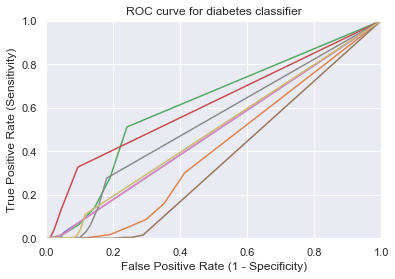

In [83]:
#reference : https://www.youtube.com/watch?v=85dtiMz9tSo
for i in range(9):
    new_y_test = [j == 'Class_'+str(i) for j in y_test]

    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    fpr, tpr, thresholds = metrics.roc_curve(new_y_test, probs[:,i])
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC curve for diabetes classifier')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)
    evaluate_threshold(0.5)


### SVM

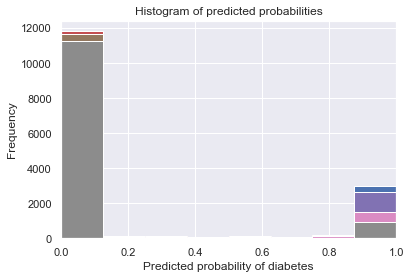

In [89]:
#reference : https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb 
#reference : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
import numpy as np
probs = svm_classifier.predict_proba(X_test)

for i in range(1,9):
    preds = probs[:,i]
    preds.shape, y_test.shape

    preds[:]


    # histogram of predicted probabilities
    plt.hist(preds, bins=8)
    plt.xlim(0, 1)
    plt.title('Histogram of predicted probabilities')
    plt.xlabel('Predicted probability of diabetes')
    plt.ylabel('Frequency')


# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


Sensitivity: nan
Specificity: 0.9999191984486102
Sensitivity: 0.02972972972972973
Specificity: 0.7346326836581709
Sensitivity: 0.02215288611544462
Specificity: 0.8385127030858139
Sensitivity: 0.03234152652005175
Specificity: 0.9543859649122807
Sensitivity: 0.012367491166077738
Specificity: 0.955376799322608
Sensitivity: 0.0036900369003690036
Specificity: 0.7713368260943045
Sensitivity: 0.011335458731845554
Specificity: 0.9448340835339684
Sensitivity: 0.038461538461538464
Specificity: 0.855726872246696
Sensitivity: 0.009395184967704051
Specificity: 0.9061182422936381


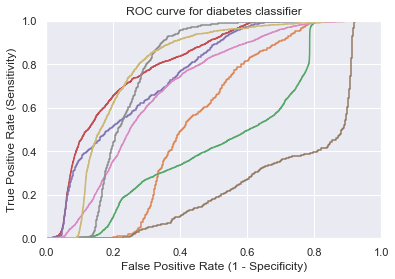

In [90]:
#reference : https://www.youtube.com/watch?v=85dtiMz9tSo
for i in range(9):
    new_y_test = [j == 'Class_'+str(i) for j in y_test]

    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    fpr, tpr, thresholds = metrics.roc_curve(new_y_test, probs[:,i])
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC curve for diabetes classifier')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)
    evaluate_threshold(0.5)


### Random Forest

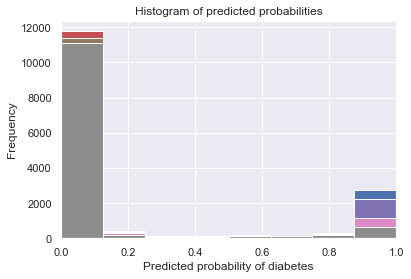

In [91]:
#refernce : https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb 
import numpy as np
probs = rf_classifier.predict_proba(X_test)

for i in range(1,9):
    preds = probs[:,i]
    preds.shape, y_test.shape

    preds[:]


    # histogram of predicted probabilities
    plt.hist(preds, bins=8)
    plt.xlim(0, 1)
    plt.title('Histogram of predicted probabilities')
    plt.xlabel('Predicted probability of diabetes')
    plt.ylabel('Frequency')


# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


Sensitivity: nan
Specificity: 0.9747091144149967
Sensitivity: 0.005405405405405406
Specificity: 0.737048142595369
Sensitivity: 0.0
Specificity: 0.8425471595245884
Sensitivity: 0.0019404915912031048
Specificity: 0.9598337950138505
Sensitivity: 0.00530035335689046
Specificity: 0.9560541913632514
Sensitivity: 0.0
Specificity: 0.7775899949298631
Sensitivity: 0.003188097768331562
Specificity: 0.9657699152098818
Sensitivity: 0.0034965034965034965
Specificity: 0.8647915960691291
Sensitivity: 0.0
Specificity: 0.9091164621006278


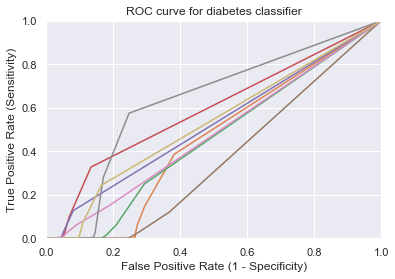

In [92]:
#reference : https://www.youtube.com/watch?v=85dtiMz9tSo
for i in range(9):
    new_y_test = [j == 'Class_'+str(i) for j in y_test]

    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    fpr, tpr, thresholds = metrics.roc_curve(new_y_test, probs[:,i])
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC curve for diabetes classifier')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)
    evaluate_threshold(0.5)


### XGBoost Methods

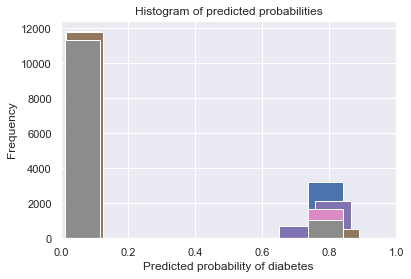

In [93]:
#refernce : https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb 
import numpy as np
probs = xgb_classifier.predict_proba(X_test)

for i in range(1,9):
    preds = probs[:,i]
    preds.shape, y_test.shape

    preds[:]


    # histogram of predicted probabilities
    plt.hist(preds, bins=8)
    plt.xlim(0, 1)
    plt.title('Histogram of predicted probabilities')
    plt.xlabel('Predicted probability of diabetes')
    plt.ylabel('Frequency')


# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


Sensitivity: nan
Specificity: 0.9701034259857789
Sensitivity: 0.0
Specificity: 0.7330501415958688
Sensitivity: 0.0
Specificity: 0.8314251444771563
Sensitivity: 0.0
Specificity: 0.9477377654662973
Sensitivity: 0.0
Specificity: 0.9569856054191364
Sensitivity: 0.0
Specificity: 0.7614500591515971
Sensitivity: 0.0
Specificity: 0.9401235214068879
Sensitivity: 0.0
Specificity: 0.855726872246696
Sensitivity: 0.0
Specificity: 0.9017146069521221


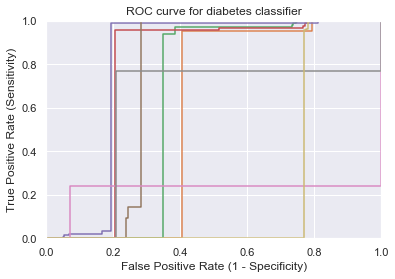

In [94]:
#reference : https://www.youtube.com/watch?v=85dtiMz9tSo
for i in range(9):
    new_y_test = [j == 'Class_'+str(i) for j in y_test]

    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    fpr, tpr, thresholds = metrics.roc_curve(new_y_test, probs[:,i])
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC curve for diabetes classifier')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)
    evaluate_threshold(0.5)
